In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Datasets/Input/train_tweet.csv')
test = pd.read_csv('/content/drive/MyDrive/Datasets/Input/test_tweets.csv')

In [ ]:
print(train.shape)
print(test.shape)

(31962, 3)
(17197, 2)


In [ ]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [ ]:
train.isnull().any()

id       False
label    False
tweet    False
dtype: bool

In [ ]:
test.isnull().any()

id       False
tweet    False
dtype: bool

In [ ]:
train[train['label']==0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [ ]:
train[train['label']==1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'...
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk fol...
77,78,1,"@user hey, white people: you can call people '..."
82,83,1,how the #altright uses &amp; insecurity to lu...
111,112,1,@user i'm not interested in a #linguistics tha...


<Axes: >

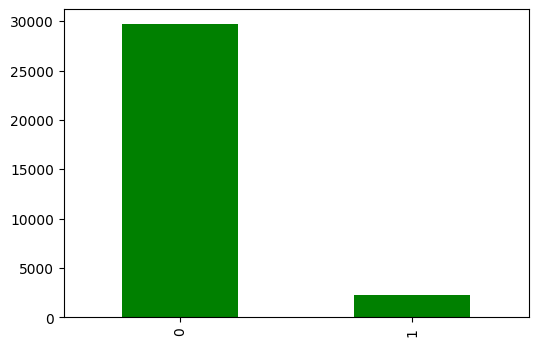

In [ ]:
train['label'].value_counts().plot.bar(color = 'green', figsize=(6,4))

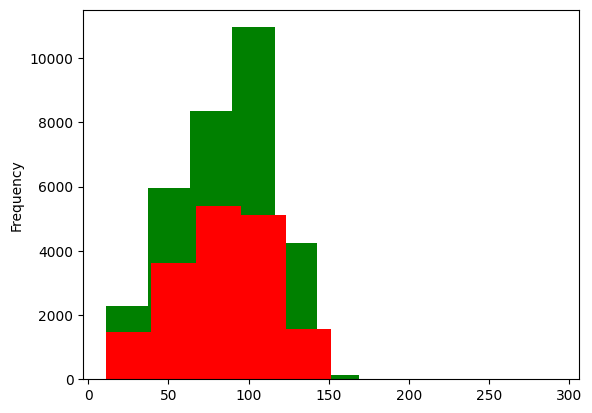

In [ ]:
len_train = train['tweet'].str.len().plot.hist(color = 'green')
len_test = test['tweet'].str.len().plot.hist(color = 'red')

In [ ]:
# adding a new column for length of tweets
train['len'] = train['tweet'].str.len()
test['len'] = test['tweet'].str.len()

In [ ]:
train.head()

,id,label,tweet,len
0,1,0,@user when a father is dysfunctional and is s...,102
1,2,0,@user @user thanks for #lyft credit i can't us...,122
2,3,0,bihday your majesty,21
3,4,0,#model i love u take with u all the time in ...,86
4,5,0,factsguide: society now #motivation,39


In [ ]:
test.head()

,id,tweet,len
0,31963,#studiolife #aislife #requires #passion #dedic...,90
1,31964,@user #white #supremacists want everyone to s...,101
2,31965,safe ways to heal your #acne!! #altwaystohe...,71
3,31966,is the hp and the cursed child book up for res...,142
4,31967,"3rd #bihday to my amazing, hilarious #nephew...",93


In [ ]:
train.groupby('label')['len'].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0,29720.0,84.328634,29.566484,11.0,62.0,88.0,107.0,274.0
1,2242.0,90.187779,27.375502,12.0,69.0,96.0,111.0,152.0


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(train.tweet)

sum_words = words.sum(axis=0)

word_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
word_freq = sorted(word_freq, key=lambda x:x[1], reverse=True)

frequency = pd.DataFrame(word_freq, columns=['word', 'freq'])



plt.title('Top 30 - Most frequently repeated words')
plt.show()

NameError: name 'train' is not defined

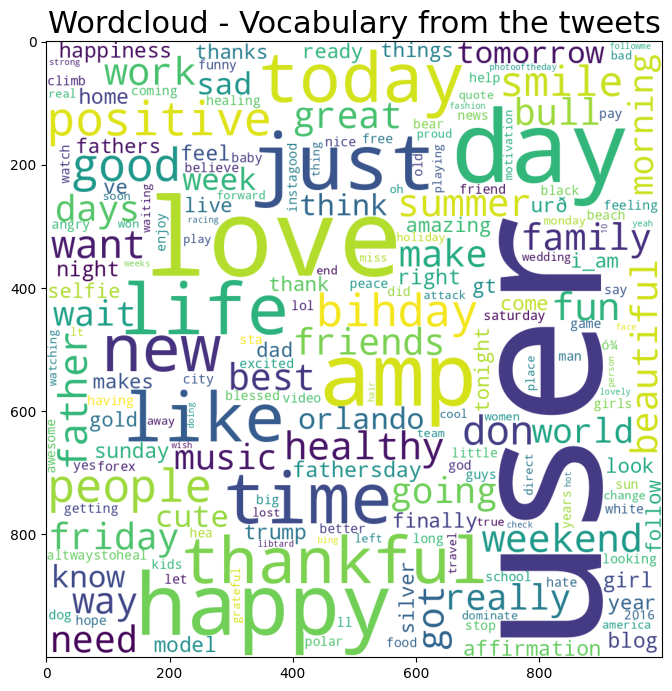

In [ ]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color='white', width=1000, height=1000).generate_from_frequencies(dict(word_freq))

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud)
plt.title("Wordcloud - Vocabulary from the tweets", fontsize=22)
plt.show()

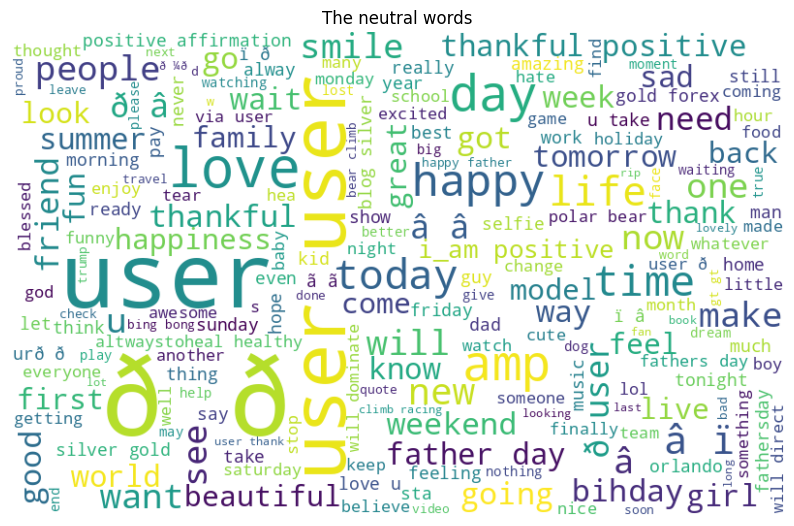

In [ ]:
normal_words = ' '.join([text for text in train['tweet'][train['label'] == 0]])

wordcloud = WordCloud(background_color='white', width=800, height=500, random_state=0, max_font_size=110).generate(normal_words)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("The neutral words")
plt.axis('off')
plt.show()

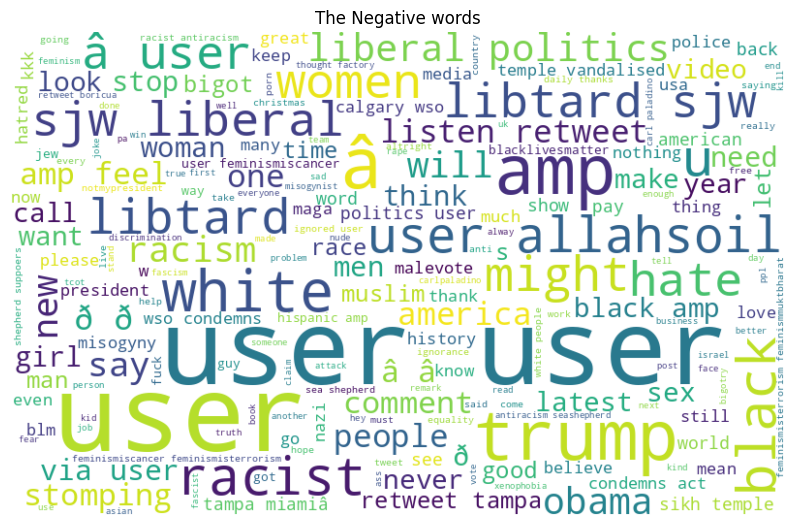

In [ ]:
negative_words = ' '.join([text for text in train['tweet'][train['label'] == 1]])

wordcloud = WordCloud(background_color='white', width=800, height=500, random_state=0, max_font_size=110).generate(negative_words)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("The Negative words")
plt.axis('off')
plt.show()

In [ ]:
# collecting the hashtags

def hashtag_extract(x):
    hashtags = []
    import re

    for i in x:
        ht = re.findall(r'#(\w+)', i)
        hashtags.append(ht)

    return hashtags

In [ ]:
# extracting hashtag from non-hate tweets
HT_regular = hashtag_extract(train['tweet'][train['label'] == 0])

# extracting hashtag from hate tweets
HT_negative = hashtag_extract(train['tweet'][train['label'] == 1])

# unnesting the list
HT_regular = sum(HT_regular, [])
HT_negative = sum(HT_negative, [])

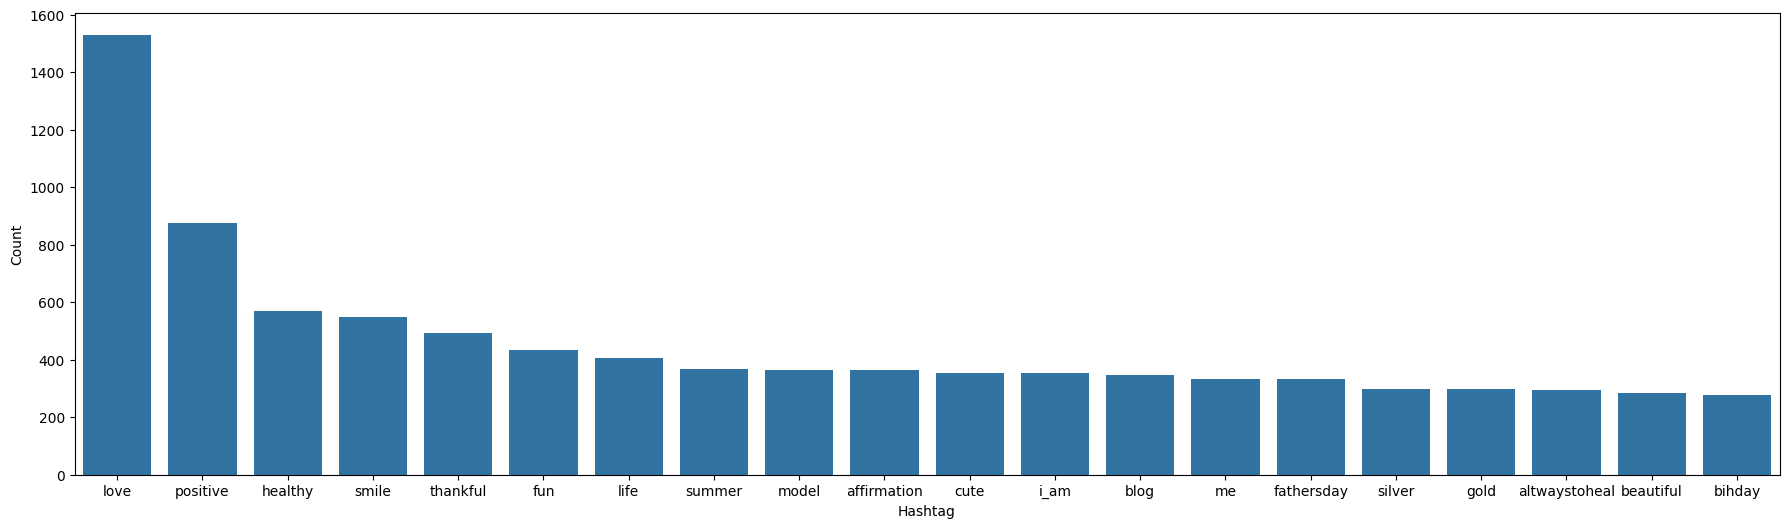

In [ ]:
# positive tweets
import nltk
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# top 20 hashtag
d = d.nlargest(columns='Count', n=20)
plt.figure(figsize=(22,6))
ax = sns.barplot(data=d, x="Hashtag", y='Count')
ax.set(ylabel = 'Count')
plt.show()

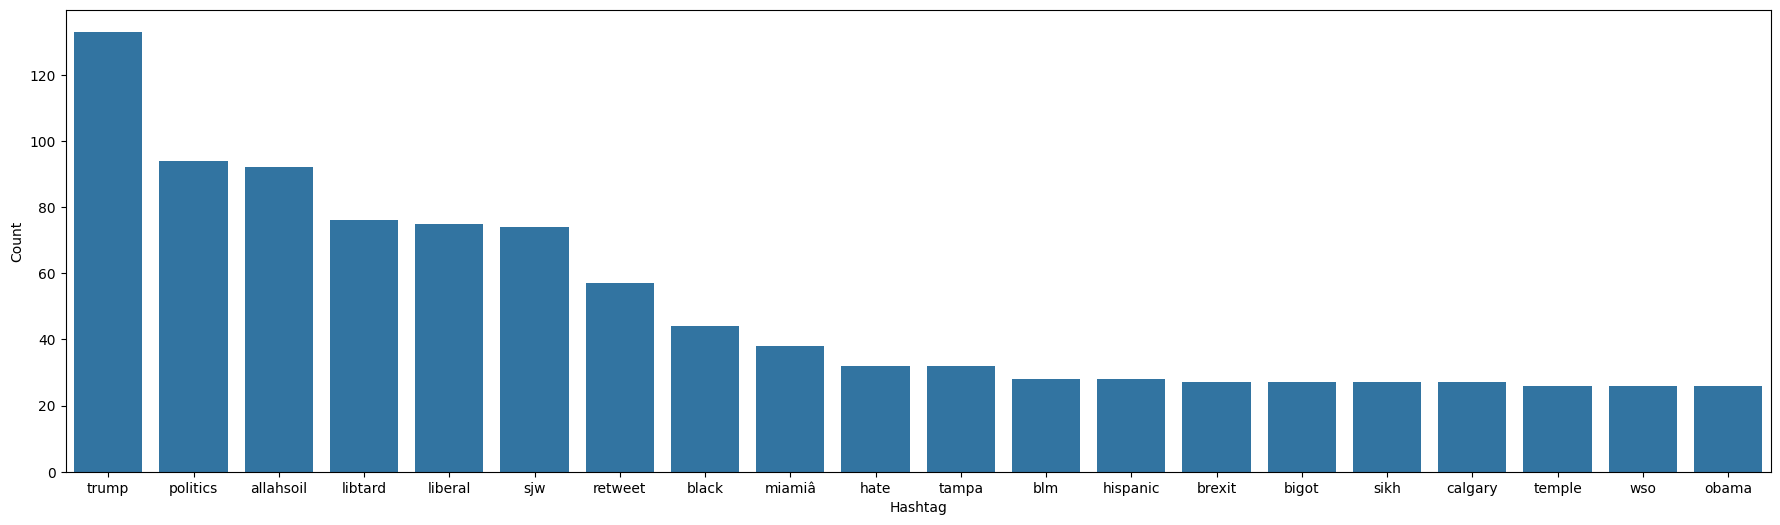

In [ ]:
# negative tweets
a = nltk.FreqDist(HT_negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# top 20 hashtag
d = d.nlargest(columns='Count', n=20)
plt.figure(figsize=(22,6))
ax = sns.barplot(data=d, x="Hashtag", y='Count')
ax.set(ylabel = 'Count')
plt.show()

In [ ]:
# tokenizing the words in the tweet
tokenized_tweet = train['tweet'].apply(lambda x: x.split())

# importing gensim
import gensim

# creating a word to vector model
model_w2v = gensim.models.Word2Vec(
                tokenized_tweet,
                vector_size = 200,     # desired number of features / independent variable
                window = 5,            # context window size
                min_count = 2,
                sg = 1,                # skipgram
                hs = 0,
                negative = 10,         # negative sample size
                seed = 42)

model_w2v.train(tokenized_tweet, total_examples= len(train['tweet']), epochs=20)

(6109313, 8411580)

In [ ]:
model_w2v.wv.most_similar(positive='india')

[('rbi', 0.6406451463699341),
 ('demonic', 0.6343654990196228),
 ('comparable', 0.5788819193840027),
 ('pakistan', 0.5748394131660461),
 ('palestinian', 0.5619810223579407),
 ('semitic', 0.5599013566970825),
 ('(read', 0.5577647089958191),
 ('mumbai', 0.5553326606750488),
 ('respected.', 0.5549539923667908),
 ('solomon', 0.5501332879066467)]

In [ ]:
model_w2v.wv.most_similar(negative='india')

[('please.', 0.08457323908805847),
 ('#blonde', 0.07812207192182541),
 ('#like4like', 0.06051904335618019),
 ('#colors', 0.0523504801094532),
 ('#ride', 0.047158535569906235),
 ('#sleep', 0.03962548449635506),
 ('#ocean', 0.037513043731451035),
 ('#nature', 0.03589845448732376),
 ('listen', 0.03479387238621712),
 ('#depressed', 0.03428483009338379)]

In [ ]:
model_w2v.wv.most_similar(positive='hate')

[('gosh..', 0.5143851637840271),
 ('dislike', 0.5109663605690002),
 ('wats', 0.4993468225002289),
 ('#prayfororlandoâ\x80¦', 0.4980211555957794),
 ('losers.', 0.4958169460296631),
 ('kill.', 0.49542731046676636),
 ('much?', 0.48966753482818604),
 ('champion,', 0.4862745702266693),
 ('intolerance.', 0.48209184408187866),
 ('#arabs', 0.48209062218666077)]

In [ ]:
from tqdm import tqdm
tqdm.pandas(desc='progress-bar')
from gensim.models.doc2vec import TaggedDocument

In [ ]:
def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(TaggedDocument(s, ['tweet_'+ str(i)]))
    return output

In [ ]:
labeled_tweet = add_label(tokenized_tweet)

In [ ]:
labeled_tweet[:5]

[TaggedDocument(words=['@user', 'when', 'a', 'father', 'is', 'dysfunctional', 'and', 'is', 'so', 'selfish', 'he', 'drags', 'his', 'kids', 'into', 'his', 'dysfunction.', '#run'], tags=['tweet_0']),
 TaggedDocument(words=['@user', '@user', 'thanks', 'for', '#lyft', 'credit', 'i', "can't", 'use', 'cause', 'they', "don't", 'offer', 'wheelchair', 'vans', 'in', 'pdx.', '#disapointed', '#getthanked'], tags=['tweet_1']),
 TaggedDocument(words=['bihday', 'your', 'majesty'], tags=['tweet_2']),
 TaggedDocument(words=['#model', 'i', 'love', 'u', 'take', 'with', 'u', 'all', 'the', 'time', 'in', 'urð\x9f\x93±!!!', 'ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91', 'ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦'], tags=['tweet_3']),
 TaggedDocument(words=['factsguide:', 'society', 'now', '#motivation'], tags=['tweet_4'])]

In [ ]:
# remove the unwanted pattens from the data
import re
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
train_corpus = []


for i in range(0, len(train)):
    review = re.sub('[^a-zA-Z]', " ", train['tweet'][i])
    review = review.lower()
    review = review.split()

    ps = PorterStemmer()

    # stemming
    review = [ps.stem(word) for word in review if word not in set(stopwords.words('english'))]

    # join back the words
    review = ' '.join(review)
    train_corpus.append(review)

In [ ]:
test_corpus = []


for i in range(0, len(test)):
    review = re.sub('[^a-zA-Z]', " ", test['tweet'][i])
    review = review.lower()
    review = review.split()

    ps = PorterStemmer()

    # stemming
    review = [ps.stem(word) for word in review if word not in set(stopwords.words('english'))]

    # join back the words
    review = ' '.join(review)
    test_corpus.append(review)

In [ ]:
# bow for train data
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)
x = cv.fit_transform(train_corpus).toarray()
y = train.iloc[:, 1]

print(x.shape)
print(y.shape)

(31962, 2500)
(31962,)


In [ ]:
# bow for test data
cv = CountVectorizer(max_features = 2500)
x_test = cv.fit_transform(test_corpus).toarray()

print(x_test.shape)

(17197, 2500)


In [ ]:
# splitting the data to train and test
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.3, random_state=42)

print(x_train.shape)
print(x_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(22373, 2500)
(17197, 2500)
(22373,)
(9589,)


In [ ]:
# standardization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_valid = sc.transform(x_valid)
x_test = sc.transform(x_test)

In [ ]:
# Random forest NLP model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, f1_score

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print('training accuracy:', model.score(x_train, y_train))
print('validation accuracy:', model.score(x_valid, y_valid))

# metrics
print('F1 Score', f1_score(y_valid, y_pred))
cm = confusion_matrix(y_valid, y_pred)
print(cm)

training accuracy: 0.999150762079292
validation accuracy: 0.9286682657211388
F1 Score 0.0
[[8905    0]
 [ 684    0]]


In [ ]:
# Decision tree
from sklearn.tree import DecisionTreeClassifier

model_1 = DecisionTreeClassifier()
model_1.fit(x_train, y_train)

y_pred = model_1.predict(x_valid)

print('training accuracy:', model_1.score(x_train, y_train))
print('validation accuracy:', model_1.score(x_valid, y_valid))

# metrics
print('F1 Score', f1_score(y_valid, y_pred))
cm_1 = confusion_matrix(y_valid, y_pred)
print(cm_1)

training accuracy: 0.999150762079292
validation accuracy: 0.9286682657211388
F1 Score 0.0
[[8905    0]
 [ 684    0]]


In [ ]:
unique, cnts = np.unique(y_valid, return_counts=True)
print(np.asarray((unique, cnts)).T)

[[   0 8905]
 [   1  684]]


In [ ]:
from xgboost import XGBClassifier

model_2 = XGBClassifier()
model_2.fit(x_train, y_train)

y_pred = model_2.predict(x_valid)

print('training accuracy:', model_2.score(x_train, y_train))
print('validation accuracy:', model_2.score(x_valid, y_valid))

# metrics
print('F1 Score', f1_score(y_valid, y_pred))
cm_2 = confusion_matrix(y_valid, y_pred)
print(cm_2)

training accuracy: 0.9622312608948286
validation accuracy: 0.9286682657211388
F1 Score 0.0
[[8905    0]
 [ 684    0]]


In [ ]:
from sklearn.svm import SVC

model_3 = SVC()
model_3.fit(x_train, y_train)

y_pred = model_3.predict(x_valid)

print('training accuracy:', model_3.score(x_train, y_train))
print('validation accuracy:', model_3.score(x_valid, y_valid))

# metrics
print('F1 Score', f1_score(y_valid, y_pred))
cm_3 = confusion_matrix(y_valid, y_pred)
print(cm_3)

training accuracy: 0.9785455683189559
validation accuracy: 0.9286682657211388
F1 Score 0.0
[[8905    0]
 [ 684    0]]
